In [571]:
import json
import joblib
import pickle
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier



import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import fairlearn

In [572]:
df=pd.read_csv('two-years-recid.csv')#.set_index('id')
df

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,...,r_case_number,r_offense_date,r_charge_degree,r_charge_desc,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,two_year_recid
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
2,3,willie gray,Male,1959-01-12,57,African-American,2014-10-31 12:02:01,2014-10-31 01:47:05,14040148MU10A,2014-10-30,...,15043364TC20A,2015-07-23,(M2),Driving License Suspended,0,NaN,NaN,NaN,NaN,1
3,4,nickson marcellus,Male,1996-07-11,19,African-American,2014-01-23 03:19:30,2014-01-23 01:04:34,13017969CF10A,NaN,...,16000241MM20A,2016-01-04,(M1),Possess Cannabis/20 Grams Or Less,0,NaN,NaN,NaN,NaN,1
4,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,6110,seccunda davis,Male,1987-05-13,28,African-American,2013-08-18 07:25:24,2013-08-19 09:01:42,13015644MM10A,2013-08-18,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
6110,6111,mark montgomery,Male,1985-11-03,30,African-American,2013-03-23 01:32:34,2013-03-28 09:37:27,13005696MM10A,2013-03-23,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
6111,6112,erica johnson,Female,1982-06-23,33,Caucasian,2013-09-29 09:25:30,2013-09-30 09:59:37,13013661CF10A,2013-09-29,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
6112,6113,barry williams,Male,1988-04-22,27,African-American,2013-10-30 03:40:14,2013-12-07 01:53:45,13004112MM10A,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0


In [573]:

# Create a copy of df as df_test
df = df.copy()

# Suppose df_test has some different values, so we'll modify it directly
# Convert columns to datetime if they are not already
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])
df['c_jail_out'] = pd.to_datetime(df['c_jail_out'])

# Switch values where c_jail_in > c_jail_out based on the mask from df
mask = df['c_jail_in'] > df['c_jail_out']
df.loc[mask, ['c_jail_in', 'c_jail_out']] = df.loc[mask, ['c_jail_out', 'c_jail_in']].values

# Print the updated df_test DataFrame
print(df)


        id               name     sex         dob  age              race  \
0        1         steven lux    Male  1953-06-15   62         Caucasian   
1        2        andre small    Male  1987-10-01   28  African-American   
2        3        willie gray    Male  1959-01-12   57  African-American   
3        4  nickson marcellus    Male  1996-07-11   19  African-American   
4        5      patria barnes  Female  1978-06-06   37             Other   
...    ...                ...     ...         ...  ...               ...   
6109  6110     seccunda davis    Male  1987-05-13   28  African-American   
6110  6111    mark montgomery    Male  1985-11-03   30  African-American   
6111  6112      erica johnson  Female  1982-06-23   33         Caucasian   
6112  6113     barry williams    Male  1988-04-22   27  African-American   
6113  6114      travis joseph    Male  1991-05-25   24  African-American   

               c_jail_in          c_jail_out  c_case_number c_offense_date  \
0    2013

In [ ]:
df_test

### Remove empty c_jail_out

In [567]:
df = df.dropna(subset=['c_jail_out'])

### Convert datatypes

In [574]:
# Convert date columns to datetime
date_columns = [
    'dob', 'c_jail_in', 'c_jail_out', 'c_offense_date', 'c_arrest_date', 
    'compas_screening_date', 'r_offense_date', 'vr_offense_date'
]

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    
    
# Convert categorical columns to 'category' dtype
categorical_columns = [
    'sex', 'race', 'c_charge_degree', 'c_charge_desc', 'type_of_assessment', 
    'score_text', 'v_type_of_assessment', 'v_score_text', 'r_charge_degree', 
    'r_charge_desc', 'vr_charge_degree', 'vr_charge_desc'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')


### Clean dataset to target variable

In [575]:
df.drop(columns=['two_year_recid'], inplace=True)

# Calculate the difference between 'r_offense_date' and 'c_jail_out'
df['offense_jail_duration'] = (df['r_offense_date'] - df['c_jail_out']).dt.days

# Create a new column based on your conditions
df['two_year_recid'] = ((df['is_recid'] == 1) & (df['offense_jail_duration'] <= 365 * 2)).astype(int)


In [576]:
df

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,...,r_offense_date,r_charge_degree,r_charge_desc,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,offense_jail_duration,two_year_recid
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,...,NaT,NaN,NaN,0,NaN,NaT,NaN,NaN,NaN,0
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,...,NaT,NaN,NaN,0,NaN,NaT,NaN,NaN,NaN,0
2,3,willie gray,Male,1959-01-12,57,African-American,2014-10-31 01:47:05,2014-10-31 12:02:01,14040148MU10A,2014-10-30,...,2015-07-23,(M2),Driving License Suspended,0,NaN,NaT,NaN,NaN,264.0,1
3,4,nickson marcellus,Male,1996-07-11,19,African-American,2014-01-23 01:04:34,2014-01-23 03:19:30,13017969CF10A,NaT,...,2016-01-04,(M1),Possess Cannabis/20 Grams Or Less,0,NaN,NaT,NaN,NaN,710.0,1
4,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,...,NaT,NaN,NaN,0,NaN,NaT,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,6110,seccunda davis,Male,1987-05-13,28,African-American,2013-08-18 07:25:24,2013-08-19 09:01:42,13015644MM10A,2013-08-18,...,NaT,NaN,NaN,0,NaN,NaT,NaN,NaN,NaN,0
6110,6111,mark montgomery,Male,1985-11-03,30,African-American,2013-03-23 01:32:34,2013-03-28 09:37:27,13005696MM10A,2013-03-23,...,NaT,NaN,NaN,0,NaN,NaT,NaN,NaN,NaN,0
6111,6112,erica johnson,Female,1982-06-23,33,Caucasian,2013-09-29 09:25:30,2013-09-30 09:59:37,13013661CF10A,2013-09-29,...,NaT,NaN,NaN,0,NaN,NaT,NaN,NaN,NaN,0
6112,6113,barry williams,Male,1988-04-22,27,African-American,2013-10-30 03:40:14,2013-12-07 01:53:45,13004112MM10A,NaT,...,NaT,NaN,NaN,0,NaN,NaT,NaN,NaN,NaN,0


### Missing values

In [418]:
# Check for missing values across columns
missing_values = df.isnull().any()

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values].index.tolist())

Columns with missing values:
['c_offense_date', 'c_arrest_date', 'c_charge_desc', 'r_case_number', 'r_offense_date', 'r_charge_degree', 'r_charge_desc', 'vr_case_number', 'vr_offense_date', 'vr_charge_degree', 'vr_charge_desc', 'offense_jail_duration']


### New offence date

In [123]:
df['new_offence_date'] = df['c_offense_date'].fillna(df['c_arrest_date'])
df.new_offence_date

/tmp/ipykernel_5642/2486100298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_offence_date'] = df['c_offense_date'].fillna(df['c_arrest_date'])


0      2013-01-05
1      2013-04-02
2      2014-10-30
3      2014-01-23
4      2013-12-07
          ...    
6109   2013-08-18
6110   2013-03-23
6111   2013-09-29
6112   2013-10-30
6113   2013-01-08
Name: new_offence_date, Length: 5854, dtype: datetime64[ns]

/tmp/ipykernel_5642/2730888577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['new_offence_date'].dt.year


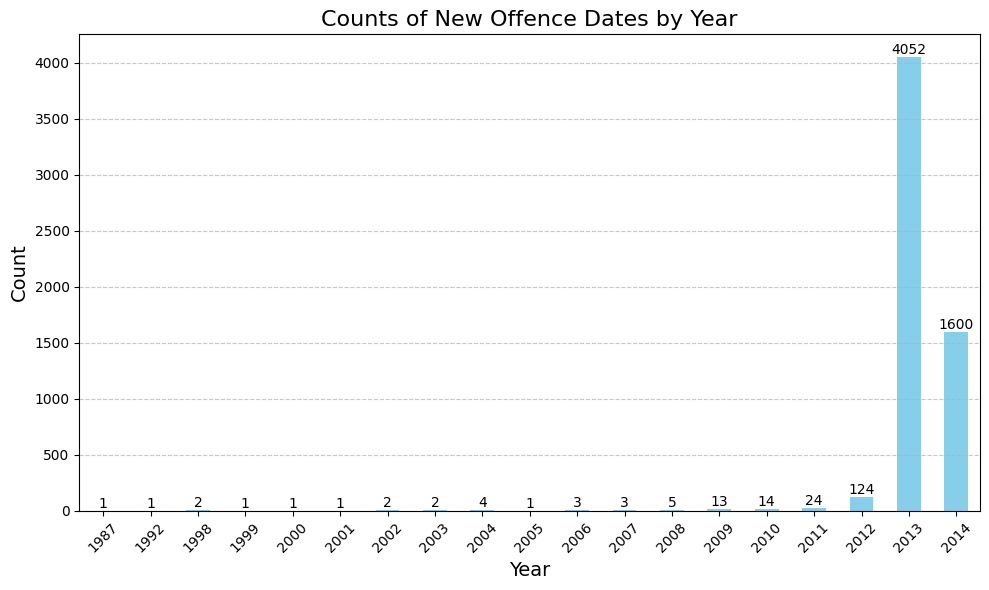

In [124]:
# Extracting year from new_offence_date
df['year'] = df['new_offence_date'].dt.year

# Counting occurrences of each year
year_counts = df['year'].value_counts().sort_index()

# Plotting the counts by year
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of New Offence Dates by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, count in enumerate(year_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()


In [125]:
# Filter dataset for new_offence_date >= 2012
#df = df[df['new_offence_date'].dt.year >= 2012]
#df.count()

### Dob vs age

In [126]:
df['dob'] = pd.to_datetime(df['dob'])


df['age_birth'] = (pd.to_datetime('today') - df['dob']).dt.days // 365
df

/tmp/ipykernel_5642/348116489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dob'] = pd.to_datetime(df['dob'])
/tmp/ipykernel_5642/348116489.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_birth'] = (pd.to_datetime('today') - df['dob']).dt.days // 365


,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,...,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,offense_jail_duration,two_year_recid,new_offence_date,year,age_birth
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,...,0,NaN,NaT,NaN,NaN,NaN,0,2013-01-05,2013,71
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,...,0,NaN,NaT,NaN,NaN,NaN,0,2013-04-02,2013,36
2,3,willie gray,Male,1959-01-12,57,African-American,2014-10-31 12:02:01,2014-10-31 01:47:05,14040148MU10A,2014-10-30,...,0,NaN,NaT,NaN,NaN,264.0,1,2014-10-30,2014,65
3,4,nickson marcellus,Male,1996-07-11,19,African-American,2014-01-23 03:19:30,2014-01-23 01:04:34,13017969CF10A,NaT,...,0,NaN,NaT,NaN,NaN,710.0,1,2014-01-23,2014,27
4,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,...,0,NaN,NaT,NaN,NaN,NaN,0,2013-12-07,2013,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,6110,seccunda davis,Male,1987-05-13,28,African-American,2013-08-18 07:25:24,2013-08-19 09:01:42,13015644MM10A,2013-08-18,...,0,NaN,NaT,NaN,NaN,NaN,0,2013-08-18,2013,37
6110,6111,mark montgomery,Male,1985-11-03,30,African-American,2013-03-23 01:32:34,2013-03-28 09:37:27,13005696MM10A,2013-03-23,...,0,NaN,NaT,NaN,NaN,NaN,0,2013-03-23,2013,38
6111,6112,erica johnson,Female,1982-06-23,33,Caucasian,2013-09-29 09:25:30,2013-09-30 09:59:37,13013661CF10A,2013-09-29,...,0,NaN,NaT,NaN,NaN,NaN,0,2013-09-29,2013,41
6112,6113,barry williams,Male,1988-04-22,27,African-American,2013-10-30 03:40:14,2013-12-07 01:53:45,13004112MM10A,NaT,...,0,NaN,NaT,NaN,NaN,NaN,0,2013-10-30,2013,36


In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
# Calculate correlation coefficient
correlation, _ = pearsonr(df['age'], df['age_birth'])
print(f'Correlation coefficient: {correlation:.2f}')



Correlation coefficient: 1.00


### Race

In [128]:
df['race'].value_counts()

race
African-American    2991
Caucasian           2019
Hispanic             498
Other                309
Asian                 26
Native American       11
Name: count, dtype: int64

In [129]:
### Sex

In [130]:
df['sex'].value_counts()

sex
Male      4730
Female    1124
Name: count, dtype: int64

### Check duplicates for name

In [131]:
# Assuming df is your DataFrame and 'column_name' is the name of the column
duplicates_mask = df.duplicated(subset=['name','dob'], keep=False)

# Filter the DataFrame to show the duplicate rows
duplicate_rows = df[duplicates_mask].sort_values(by='name')
duplicate_rows

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,...,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,offense_jail_duration,two_year_recid,new_offence_date,year,age_birth


In [132]:
df.count()

id                       5854
name                     5854
sex                      5854
dob                      5854
age                      5854
race                     5854
c_jail_in                5854
c_jail_out               5854
c_case_number            5854
c_offense_date           4983
c_arrest_date             871
c_charge_degree          5854
c_charge_desc            5848
juv_fel_count            5854
juv_misd_count           5854
juv_other_count          5854
priors_count             5854
compas_screening_date    5854
type_of_assessment       5854
decile_score             5854
score_text               5854
v_type_of_assessment     5854
v_decile_score           5854
v_score_text             5854
is_recid                 5854
r_case_number            2879
r_offense_date           2879
r_charge_degree          2879
r_charge_desc            2830
is_violent_recid         5854
vr_case_number            681
vr_offense_date           681
vr_charge_degree          681
vr_charge_

### Deleting non sense rows

In [450]:
df_removed=df.copy()

df_removed=df_removed[~((df_removed['c_jail_in'] > df_removed['c_jail_out']) 
                         # | (df_removed['c_jail_in'] > df_removed['c_offense_date']) 
                         # | (df_removed['c_jail_in'] > df_removed['c_arrest_date'])
                         )
                       ]
df_removed

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,...,r_charge_degree,r_charge_desc,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,offense_jail_duration,two_year_recid,charge_severity
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,...,NaN,NaN,0,NaN,NaT,NaN,NaN,NaN,0,NaN
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,...,NaN,NaN,0,NaN,NaT,NaN,NaN,NaN,0,NaN
4,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,...,NaN,NaN,0,NaN,NaT,NaN,NaN,NaN,0,NaN
5,6,david corbin,Male,1993-02-18,23,African-American,2013-11-11 08:40:03,2013-11-12 01:22:51,13015689CF10A,2013-11-11,...,(F2),Poss F/Arm Delinq,0,NaN,NaT,NaN,NaN,72.0,1,NaN
6,7,joseph brock,Male,1989-10-20,26,Caucasian,2013-03-25 11:41:47,2013-03-26 01:03:38,13004331CF10A,2013-03-25,...,NaN,NaN,0,NaN,NaT,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,6110,seccunda davis,Male,1987-05-13,28,African-American,2013-08-18 07:25:24,2013-08-19 09:01:42,13015644MM10A,2013-08-18,...,NaN,NaN,0,NaN,NaT,NaN,NaN,NaN,0,NaN
6110,6111,mark montgomery,Male,1985-11-03,30,African-American,2013-03-23 01:32:34,2013-03-28 09:37:27,13005696MM10A,2013-03-23,...,NaN,NaN,0,NaN,NaT,NaN,NaN,NaN,0,NaN
6111,6112,erica johnson,Female,1982-06-23,33,Caucasian,2013-09-29 09:25:30,2013-09-30 09:59:37,13013661CF10A,2013-09-29,...,NaN,NaN,0,NaN,NaT,NaN,NaN,NaN,0,NaN
6112,6113,barry williams,Male,1988-04-22,27,African-American,2013-10-30 03:40:14,2013-12-07 01:53:45,13004112MM10A,NaT,...,NaN,NaN,0,NaN,NaT,NaN,NaN,NaN,0,NaN


In [134]:
### Balanced

In [527]:
df_removed['two_year_recid'].value_counts()

two_year_recid
False    2877
True     2804
Name: count, dtype: int64

In [528]:
df['two_year_recid'].value_counts()

two_year_recid
0    3157
1    2697
Name: count, dtype: int64

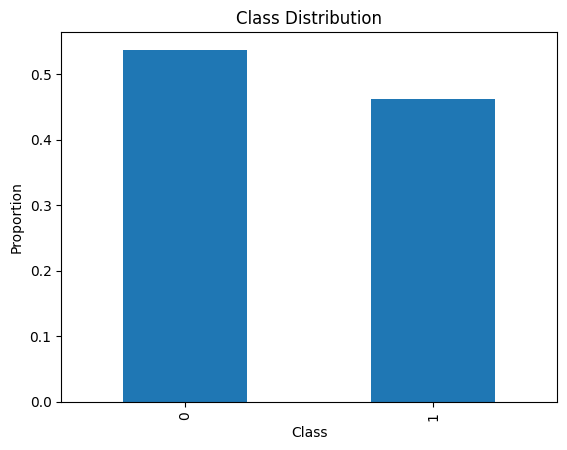

In [135]:
# Assuming 'target_column' is the name of the target variable column in your DataFrame
class_balance = df_removed['two_year_recid'].value_counts(normalize=True)
class_balance.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Class Distribution')
plt.show()

/tmp/ipykernel_5642/600439470.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('race')['two_year_recid'].mean().plot(kind='bar')


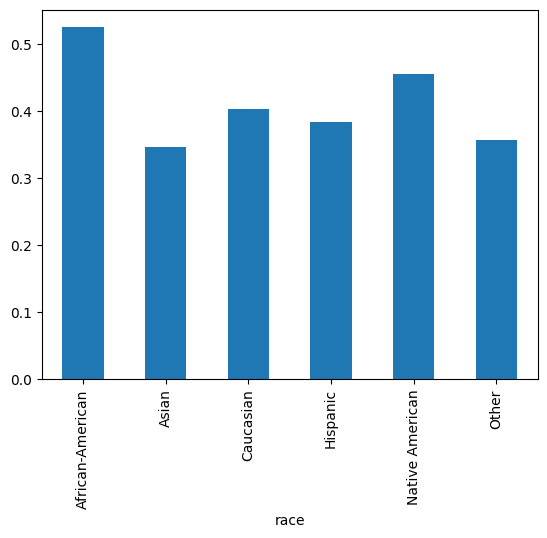

In [136]:
df.groupby('race')['two_year_recid'].mean().plot(kind='bar')
plt.show()

/tmp/ipykernel_5642/681357320.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['two_year_recid'].mean().plot(kind='bar')


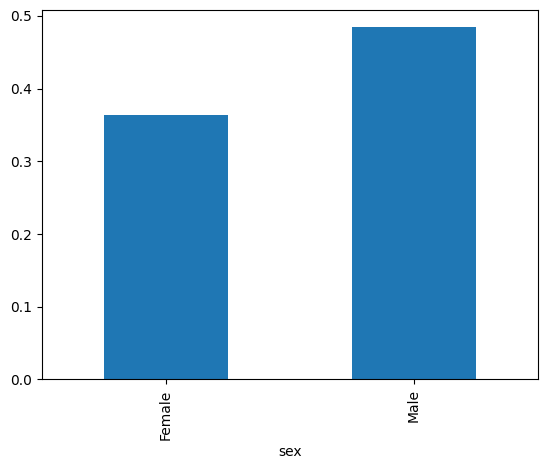

In [137]:
df.groupby('sex')['two_year_recid'].mean().plot(kind='bar')
plt.show()

### Correlation

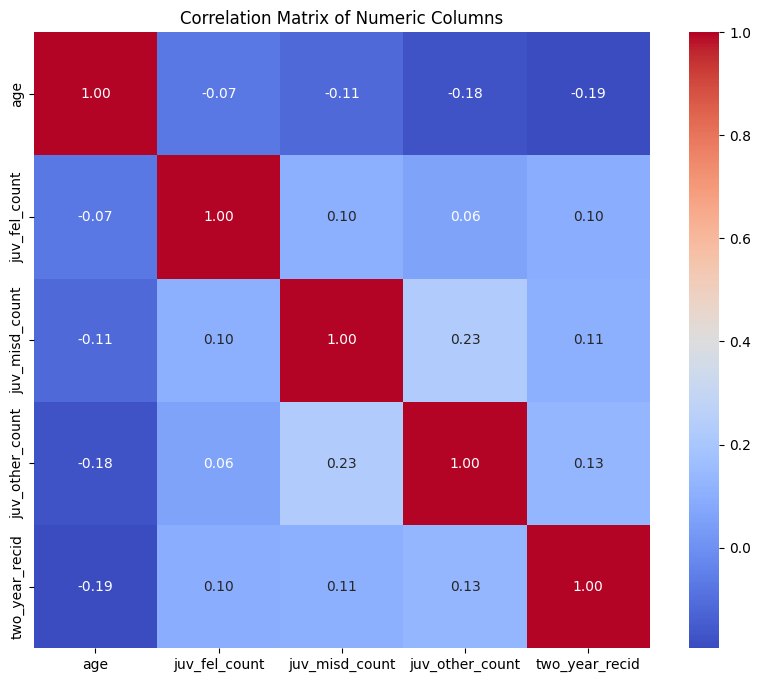

In [139]:
# Select numeric columns
numeric_columns = df[['age',
                      'juv_fel_count',
                      'juv_misd_count',
                      'juv_other_count',
                      'two_year_recid']]

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

### Temporal Analysis

In [383]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from statsmodels.tsa.seasonal import seasonal_decompose

# Sample data loading
# df = pd.read_csv('your_data.csv')  # Uncomment and modify to load your data

# Drop missing values from the 'two_year_recid' column
df = df.dropna(subset=['is_recid'])

# Convert date columns to datetime
date_columns = ['c_jail_in', 'c_jail_out', 'new_offence_date', 
                'compas_screening_date', 'r_offense_date', 'vr_offense_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Ensure the target column is time series data
#df.set_index('new_offence_date', inplace=True)

# Resample the data and calculate the mean, then drop missing values
resampled_data = df['is_recid'].resample('D').mean().dropna()

# Perform seasonal decomposition
#result = seasonal_decompose(resampled_data, model='additive', period=365)  # Adjust period for your data frequency

# Plot decomposition
result.plot()
plt.show()


KeyError: 'new_offence_date'

### Baseline Model

In [578]:
# Convert columns to the specified types
df = df.astype({
    "id": str,
    "name": str,
    "sex": str,
    "dob": str,
    "race": str,
    "juv_fel_count": int,
    "juv_misd_count": int,
    "juv_other_count": int,
    "priors_count": int,
    "c_case_number": str,
    "c_charge_degree": str,
    "c_charge_desc": str,
    "c_offense_date": str,
    "c_arrest_date": str,
    "c_jail_in": str
})

# Convert boolean columns separately
df['two_year_recid'] = df['is_recid'].astype(bool)

# Verify the types
print(df.dtypes)

id                               object
name                             object
sex                              object
dob                              object
age                               int64
race                             object
c_jail_in                        object
c_jail_out               datetime64[ns]
c_case_number                    object
c_offense_date                   object
c_arrest_date                    object
c_charge_degree                  object
c_charge_desc                    object
juv_fel_count                     int64
juv_misd_count                    int64
juv_other_count                   int64
priors_count                      int64
compas_screening_date    datetime64[ns]
type_of_assessment             category
decile_score                      int64
score_text                     category
v_type_of_assessment           category
v_decile_score                    int64
v_score_text                   category
is_recid                          int64


In [586]:
df.two_year_recid.value_counts()

two_year_recid
False    3183
True     2931
Name: count, dtype: int64

In [583]:
#from imblearn.over_sampling import SMOTE



all_features = [
    "name",
    "sex",
    "dob",
    "race",
    "juv_fel_count",
    "juv_misd_count",
    "juv_other_count",
    "priors_count",
    "c_case_number",
    "c_charge_degree",
    "c_charge_desc",
    "c_offense_date",
    "c_arrest_date",
    "c_jail_in"
]

numerical_features = [
    "juv_fel_count",
    "juv_misd_count",
    "juv_other_count",
    "priors_count"
                      ]

categorical_features = [
    "name",
    "sex",
    "dob",
    "race",
    "c_case_number",
    "c_charge_degree",
    "c_charge_desc",
    "c_offense_date",
    "c_arrest_date",
    "c_jail_in"
]

#numerical_features = ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count','v_decile_score','decile_score','is_violent_recid']

#categorical_features = [
#  'sex',
#  'race',
  #'c_charge_degree'
  #'r_charge_degree',
  #'vr_charge_degree'    
#]


#df_model = df_removed.dropna(subset=all_features + [target])

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

target = 'two_year_recid'

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = make_pipeline(
    preprocessor,
    GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50,random_state=42)
    #AdaBoostClassifier(learning_rate = 0.1, n_estimators= 200)
    #LogisticRegression(max_iter=1000)
    #LogisticRegression(C= 1.0, penalty= 'l1')
    #RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300)
    #RandomForestClassifier(max_depth=3, min_samples_leaf=.03, class_weight="balanced", random_state=42, n_jobs=-1),
    #RandomForestClassifier(max_depth=3, min_samples_leaf=.03, random_state=42, n_jobs=-1),
    
)


X_train = df_train[all_features]
y_train = df_train[target]

pipeline.fit(X_train, y_train)

X_test = df_test[all_features]
y_test = df_test[target]

y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

#Accuracy: 0.68
#Precision: 0.71
#Recall: 0.58
#F1-Score: 0.64
#ROC-AUC: 0.68

#normal:
#Accuracy: 0.69
#Precision: 0.71
#Recall: 0.53
#F1-Score: 0.60
#ROC-AUC: 0.67

Accuracy: 0.67
Precision: 0.68
Recall: 0.61
F1-Score: 0.64
ROC-AUC: 0.66


In [ ]:
#changing jail in and jail out:
#Accuracy: 0.68
#Precision: 0.70
#Recall: 0.60
#F1-Score: 0.64
#ROC-AUC: 0.67

# code Running

### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Define a dictionary of models with their respective parameter grids for hyperparameter tuning
models = {
    'Logistic Regression': {
        'model': LogisticRegression(solver='liblinear'),  # Change solver here
        'params': {
            'classifier__C': [0.1, 1.0, 10.0],
            'classifier__penalty': ['l1', 'l2']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [None, 5, 10, 20],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [None, 5, 10, 20],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__bootstrap': [True, False]
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'params': {
            'classifier__C': [0.1, 1.0, 10.0],
            'classifier__kernel': ['linear', 'rbf']
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 1.0]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 1.0],
            'classifier__max_depth': [3, 5, 7]
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    },
    'Multi-layer Perceptron': {
        'model': MLPClassifier(),
        'params': {
            'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],
            'classifier__activation': ['logistic', 'relu'],
            'classifier__alpha': [0.0001, 0.001, 0.01]
        }
    },
    'Extra Trees': {
        'model': ExtraTreesClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 5, 10, 20],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__bootstrap': [True, False]
        }
    }
}

for name, model_info in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model_info['model'])])
    grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, scoring=['roc_auc'], refit='roc_auc', error_score='raise')
    grid_search.fit(X_train, y_train)
    print(f'Best parameters for {name}: {grid_search.best_params_}')
    print(f'ROC AUC Score: {grid_search.best_score_:.4f}')


Best parameters for Logistic Regression: {'classifier__C': 1.0, 'classifier__penalty': 'l2'}
ROC AUC Score: 0.7223
Best parameters for Decision Tree: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}
ROC AUC Score: 0.6934
Best parameters for Random Forest: {'classifier__bootstrap': False, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
ROC AUC Score: 0.7155
Best parameters for Support Vector Machine: {'classifier__C': 10.0, 'classifier__kernel': 'rbf'}
ROC AUC Score: 0.7289
Best parameters for AdaBoost: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200}
ROC AUC Score: 0.7191
Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
ROC AUC Score: 0.7280
Best parameters for K-Nearest Neighbors: {'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Define a dictionary of models with their respective parameter grids for hyperparameter tuning
models = {
    'Logistic Regression': {
        'model': LogisticRegression(solver='liblinear'),  # Change solver here
        'params': {
            'classifier__C': [0.1, 1.0, 10.0],
            'classifier__penalty': ['l1', 'l2']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [None, 5, 10, 20],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [None, 5, 10, 20],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__bootstrap': [True, False]
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'params': {
            'classifier__C': [0.1, 1.0, 10.0],
            'classifier__kernel': ['linear', 'rbf']
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 1.0]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 1.0],
            'classifier__max_depth': [3, 5, 7]
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    },
    'Multi-layer Perceptron': {
        'model': MLPClassifier(),
        'params': {
            'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],
            'classifier__activation': ['logistic', 'relu'],
            'classifier__alpha': [0.0001, 0.001, 0.01]
        }
    },
    'Extra Trees': {
        'model': ExtraTreesClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 5, 10, 20],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__bootstrap': [True, False]
        }
    }
}

for name, model_info in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model_info['model'])])
    grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, scoring=['f1'], refit='f1', error_score='raise')
    grid_search.fit(X_train, y_train)
    print(f'Best parameters for {name}: {grid_search.best_params_}')
    print(f'ROC AUC Score: {grid_search.best_score_:.4f}')


### Serialization

In [ ]:
# Serialization
TMP_DIR = ''

# Serialize the column names from the X DataFrame into a file named columns.json
# YOUR CODE HERE
with open(os.path.join(TMP_DIR, "columns.json"), 'w') as fh:
    json.dump(X_train.columns.tolist(), fh)

# Pickle the dtypes of the columns from the X DataFrame into a file named dtypes.pickle
# YOUR CODE HERE
with open(os.path.join(TMP_DIR,'dtypes.pickle'), 'wb') as fh:
    pickle.dump(X_train.dtypes, fh)
    
# Pickle the fitted pipeline into a file named pipeline.pickle
# YOUR CODE HERE
import joblib
joblib.dump(pipeline, os.path.join(TMP_DIR,'pipeline.pickle'))

# Baseline Scoring
roc_auc_score(y_test, y_pred)

### Feature Engineering

In [451]:
### Charge Description

def categorize_charge(charge):
    if pd.isnull(charge):
        return 'Unknown'
    elif charge == 'False Imprisonment':
        return 'False Imprisonment'
    elif charge == 'arrest case no charge':
        return 'No Charge'
    elif 'battery' in charge.lower() or 'assault' in charge.lower() or 'abuse' in charge.lower():
        return 'Violent Crimes'
    elif 'theft' in charge.lower() or 'burglary' in charge.lower() or 'robbery' in charge.lower():
        return 'Theft'
    elif 'dui' in charge.lower() or 'driving' in charge.lower() or 'license' in charge.lower():
        return 'Driving Offenses'
    elif 'possession' in charge.lower() or 'cocaine' in charge.lower() or 'methamphetamine' in charge.lower() or 'cannabis' in charge.lower():
        return 'Drug-related Crimes'
    elif 'sex' in charge.lower() or 'prostitution' in charge.lower() or 'lewd' in charge.lower():
        return 'Sex-related Crimes'
    else:
        return 'Other Crimes'

df_removed['charge_category'] = df_removed['c_charge_desc'].apply(categorize_charge)

df_removed[['c_charge_desc','charge_category']]

,c_charge_desc,charge_category
0,False Imprisonment,False Imprisonment
1,Battery,Violent Crimes
4,Battery,Violent Crimes
5,Poss Cntrft Contr Sub w/Intent,Other Crimes
6,Possession Of Methamphetamine,Drug-related Crimes
...,...,...
6109,Battery,Violent Crimes
6110,Possess Cannabis/20 Grams Or Less,Drug-related Crimes
6111,Felony Driving While Lic Suspd,Driving Offenses
6112,arrest case no charge,No Charge


In [452]:
##AGE

df_removed['dob'] = pd.to_datetime(df_removed['dob'])
df_removed['age_birth'] = (pd.to_datetime('today') - df_removed['dob']).dt.days // 365


In [453]:
## NEW new_offence_date
df_removed['new_offence_date'] = df_removed['c_offense_date'].fillna(df_removed['c_arrest_date'])
df_removed.new_offence_date

0      2013-01-05
1      2013-04-02
4      2013-12-07
5      2013-11-11
6      2013-03-25
          ...    
6109   2013-08-18
6110   2013-03-23
6111   2013-09-29
6112   2013-10-30
6113   2013-01-08
Name: new_offence_date, Length: 5681, dtype: datetime64[ns]

In [454]:
df_removed.c_jail_in

0      2013-01-05 04:35:31
1      2013-04-02 12:18:46
4      2013-12-08 01:55:28
5      2013-11-11 08:40:03
6      2013-03-25 11:41:47
               ...        
6109   2013-08-18 07:25:24
6110   2013-03-23 01:32:34
6111   2013-09-29 09:25:30
6112   2013-10-30 03:40:14
6113   2013-01-08 01:30:33
Name: c_jail_in, Length: 5681, dtype: datetime64[ns]

In [455]:
### Timings

In [456]:
# Assuming c_jail_in is in datetime format
df_removed['c_jail_in_hour'] = df_removed['c_jail_in'].dt.hour
df_removed['c_jail_in_minute'] = df_removed['c_jail_in'].dt.minute
df_removed

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,...,vr_charge_degree,vr_charge_desc,offense_jail_duration,two_year_recid,charge_severity,charge_category,age_birth,new_offence_date,c_jail_in_hour,c_jail_in_minute
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,...,NaN,NaN,NaN,0,NaN,False Imprisonment,71,2013-01-05,4,35
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,...,NaN,NaN,NaN,0,NaN,Violent Crimes,36,2013-04-02,12,18
4,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,...,NaN,NaN,NaN,0,NaN,Violent Crimes,46,2013-12-07,1,55
5,6,david corbin,Male,1993-02-18,23,African-American,2013-11-11 08:40:03,2013-11-12 01:22:51,13015689CF10A,2013-11-11,...,NaN,NaN,72.0,1,NaN,Other Crimes,31,2013-11-11,8,40
6,7,joseph brock,Male,1989-10-20,26,Caucasian,2013-03-25 11:41:47,2013-03-26 01:03:38,13004331CF10A,2013-03-25,...,NaN,NaN,NaN,0,NaN,Drug-related Crimes,34,2013-03-25,11,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,6110,seccunda davis,Male,1987-05-13,28,African-American,2013-08-18 07:25:24,2013-08-19 09:01:42,13015644MM10A,2013-08-18,...,NaN,NaN,NaN,0,NaN,Violent Crimes,37,2013-08-18,7,25
6110,6111,mark montgomery,Male,1985-11-03,30,African-American,2013-03-23 01:32:34,2013-03-28 09:37:27,13005696MM10A,2013-03-23,...,NaN,NaN,NaN,0,NaN,Drug-related Crimes,38,2013-03-23,1,32
6111,6112,erica johnson,Female,1982-06-23,33,Caucasian,2013-09-29 09:25:30,2013-09-30 09:59:37,13013661CF10A,2013-09-29,...,NaN,NaN,NaN,0,NaN,Driving Offenses,42,2013-09-29,9,25
6112,6113,barry williams,Male,1988-04-22,27,African-American,2013-10-30 03:40:14,2013-12-07 01:53:45,13004112MM10A,NaT,...,NaN,NaN,NaN,0,NaN,No Charge,36,2013-10-30,3,40


In [457]:
# Extract month, day of the week, and quarter from date variables

df_removed['c_offence_month'] = df_removed['new_offence_date'].dt.month
df_removed['c_offence_dayofweek'] = df_removed['new_offence_date'].dt.dayofweek
df_removed['c_offence_quarter'] = df_removed['new_offence_date'].dt.quarter


# Assuming c_offense_date is in datetime format
df_removed['offence_is_weekend'] = df_removed['new_offence_date'].dt.dayofweek // 5


In [458]:
# Extract month, day of the week, and quarter from date variables

df_removed['c_jail_month'] = df_removed['c_jail_in'].dt.month
df_removed['c_jail_dayofweek'] = df_removed['c_jail_in'].dt.dayofweek
df_removed['c_jail_quarter'] = df_removed['c_jail_in'].dt.quarter


# Assuming c_offense_date is in datetime format
df_removed['jail_is_weekend'] = df_removed['c_jail_in'].dt.dayofweek // 5


In [459]:
df_removed.c_jail_in.dtype

dtype('<M8[ns]')

In [460]:
# Season of Offense
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_removed['season_of_offense'] = pd.to_datetime(df_removed['c_offense_date']).dt.month.apply(get_season)
df_removed

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,...,c_jail_in_minute,c_offence_month,c_offence_dayofweek,c_offence_quarter,offence_is_weekend,c_jail_month,c_jail_dayofweek,c_jail_quarter,jail_is_weekend,season_of_offense
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,...,35,1,5,1,1,1,5,1,1,Winter
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,...,18,4,1,2,0,4,1,2,0,Spring
4,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,...,55,12,5,4,1,12,6,4,1,Winter
5,6,david corbin,Male,1993-02-18,23,African-American,2013-11-11 08:40:03,2013-11-12 01:22:51,13015689CF10A,2013-11-11,...,40,11,0,4,0,11,0,4,0,Fall
6,7,joseph brock,Male,1989-10-20,26,Caucasian,2013-03-25 11:41:47,2013-03-26 01:03:38,13004331CF10A,2013-03-25,...,41,3,0,1,0,3,0,1,0,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,6110,seccunda davis,Male,1987-05-13,28,African-American,2013-08-18 07:25:24,2013-08-19 09:01:42,13015644MM10A,2013-08-18,...,25,8,6,3,1,8,6,3,1,Summer
6110,6111,mark montgomery,Male,1985-11-03,30,African-American,2013-03-23 01:32:34,2013-03-28 09:37:27,13005696MM10A,2013-03-23,...,32,3,5,1,1,3,5,1,1,Spring
6111,6112,erica johnson,Female,1982-06-23,33,Caucasian,2013-09-29 09:25:30,2013-09-30 09:59:37,13013661CF10A,2013-09-29,...,25,9,6,3,1,9,6,3,1,Fall
6112,6113,barry williams,Male,1988-04-22,27,African-American,2013-10-30 03:40:14,2013-12-07 01:53:45,13004112MM10A,NaT,...,40,10,2,4,0,10,2,4,0,Fall


In [461]:
### Previous Crimes

In [462]:
# Calculate juv_count
df_removed['juv_count'] = df_removed['juv_fel_count'] + df_removed['juv_misd_count'] + df_removed['juv_other_count']

# Calculate juv_adult
df_removed['juv_adult'] = df_removed['priors_count'] - df_removed['juv_count']


In [463]:
##Age Group

bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df_removed['age_group'] = pd.cut(df_removed['age_birth'], bins=bins, labels=labels)


In [464]:
###length_of_stay
# Convert 'c_jail_in' and 'c_jail_out' to datetime
df_removed['c_jail_in'] = pd.to_datetime(df_removed['c_jail_in'])
df_removed['c_jail_out'] = pd.to_datetime(df_removed['c_jail_out'])

# Calculate the length of stay
df_removed['length_of_stay'] = df_removed['c_jail_out'] - df_removed['c_jail_in']

# Optionally, if you want to convert the length_of_stay to a number of days
df_removed['length_of_stay_days'] = df_removed['length_of_stay'].dt.days


In [465]:
import pandas as pd

# Assuming df_removed is your DataFrame
# Convert 'c_offense_date' and 'dob' to datetime
df_removed['new_offence_date'] = pd.to_datetime(df_removed['new_offence_date'], errors='coerce')
df_removed['dob'] = pd.to_datetime(df_removed['dob'], errors='coerce')

# Calculate age at offense
df_removed['age_at_offense'] = (df_removed['new_offence_date'] - df_removed['dob']).dt.days // 365

# Handle NaN values by filling with 0 or any appropriate value
df_removed['age_at_offense'] = df_removed['age_at_offense'].fillna(0).astype(int)



In [466]:
severity_mapping = {'petty theft': 'low', 'assault': 'medium', 'armed robbery': 'high'}
df['charge_severity'] = df['c_charge_desc'].map(severity_mapping)


/tmp/ipykernel_5642/2873335374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['charge_severity'] = df['c_charge_desc'].map(severity_mapping)


In [467]:
df_train.dtypes

id                                 int64
name                              object
sex                             category
dob                       datetime64[ns]
age                                int64
race                            category
c_jail_out                datetime64[ns]
c_case_number                     object
c_offense_date            datetime64[ns]
c_arrest_date             datetime64[ns]
c_charge_degree                 category
c_charge_desc                   category
juv_fel_count                      int64
juv_misd_count                     int64
juv_other_count                    int64
priors_count                       int64
compas_screening_date     datetime64[ns]
type_of_assessment              category
decile_score                       int64
score_text                      category
v_type_of_assessment            category
v_decile_score                     int64
v_score_text                    category
is_recid                           int64
r_case_number   

### Advanced Model

In [550]:
#from imblearn.over_sampling import SMOTE

all_features = [
    "name",
    "sex",
   # "dob",
    "race",
    #"juv_fel_count",
    #"juv_misd_count",
    #"juv_other_count",
    #"priors_count",
    #"c_case_number",
    "c_charge_degree",
    "charge_category",
    "c_offense_date",
    "c_arrest_date",
    "c_jail_in",
    #"age_group",
    "age_birth",
    #"offence_is_weekend",
    "juv_count",
    "juv_adult",
    #"c_offence_month"
    "age_at_offense",
   # "length_of_stay_days",
#    "c_offence_dayofweek",
 #    "season_of_offense",
 #   "c_jail_in_hour",
  #  "length_of_stay",
]

numerical_features = [
    #"juv_fel_count",
    #"juv_misd_count",
    #"juv_other_count",
    #"priors_count",
    "juv_count",
    "juv_adult",
    "age_birth",
    #"c_offence_month"
    "age_at_offense",
    #"length_of_stay_days",
#    "c_offence_dayofweek",
#    "c_jail_in_hour",
    #"length_of_stay"
                      ]

categorical_features = [
    "name",
    "sex",
    "race",
    #"c_case_number",
    "c_charge_degree",
    "charge_category",
  #  "c_offense_date",
  #  "c_arrest_date",
    "c_jail_in" ,
 #   "season_of_offense",
    ]


df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

target = 'two_year_recid'

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = make_pipeline(
    preprocessor,
    GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=50,random_state=42)
    #AdaBoostClassifier(learning_rate = 0.1, n_estimators= 200)
    #LogisticRegression(max_iter=1000)
    #LogisticRegression(C= 1.0, penalty='l1')
    #RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300)
    #RandomForestClassifier(max_depth=3, min_samples_leaf=.03, class_weight="balanced", random_state=42, n_jobs=-1),
    #RandomForestClassifier(max_depth=3, min_samples_leaf=.03, random_state=42, n_jobs=-1),
    
)

X_train = df_train[all_features]
y_train = df_train[target]

pipeline.fit(X_train, y_train)

X_test = df_test[all_features]
y_test = df_test[target]

y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')


##BASELINE##
#Accuracy: 0.66
#Precision: 0.68
#Recall: 0.57
#F1-Score: 0.62
#ROC-AUC: 0.66

#Without name & case
#Accuracy: 0.67
#Precision: 0.69
#Recall: 0.59
#F1-Score: 0.63
#ROC-AUC: 0.67

KeyError: "['charge_category', 'age_birth', 'juv_count', 'juv_adult', 'age_at_offense'] not in index"

### Fairness

#### Race

In [ ]:
#####RACE#######
from fairlearn.metrics import (
    demographic_parity_ratio,
    equalized_odds_ratio,
    true_positive_rate_difference,
    false_positive_rate_difference,
    selection_rate_difference
)

# Assuming y_test contains the true labels and y_pred contains the predicted labels
# Calculate fairness metrics
disparate_impact = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['race'])
equalized_odds = equalized_odds_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['race'])
tpr_diff = true_positive_rate_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['race'])
fpr_diff = false_positive_rate_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['race'])
selection_rate_diff = selection_rate_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['race'])

print("Disparate Impact Ratio:", disparate_impact)
print("Equalized Odds Ratio:", equalized_odds)
print("True Positive Rate Difference:", tpr_diff)
print("False Positive Rate Difference:", fpr_diff)
print("Selection Rate Difference:", selection_rate_diff)


In [ ]:
# Calculate Disparate Impact Ratio
def calculate_disparate_impact(y_true, y_pred, sensitive_features, favorable_label):
    # Calculate the acceptance rates for each group
    group_acceptance_rates = {}
    for group_val in sensitive_features.unique():
        mask = sensitive_features == group_val
        accepted = (y_pred[mask] == favorable_label).sum()
        total = len(y_pred[mask])
        group_acceptance_rates[group_val] = accepted / total

    # Find the group with the highest acceptance rate
    highest_acceptance_rate = max(group_acceptance_rates.values())

    # Find the group with the lowest acceptance rate
    lowest_acceptance_rate = min(group_acceptance_rates.values())

    # Calculate the disparate impact ratio
    disparate_impact_ratio = highest_acceptance_rate / lowest_acceptance_rate

    return disparate_impact_ratio

# Calculate Demographic Parity
def calculate_demographic_parity(y_true, y_pred, sensitive_features, favorable_label):
    # Calculate acceptance rates for each group
    group_acceptance_rates = {}
    for group_val in sensitive_features.unique():
        mask = sensitive_features == group_val
        accepted = (y_pred[mask] == favorable_label).sum()
        total = len(y_pred[mask])
        group_acceptance_rates[group_val] = accepted / total

    # Calculate the overall acceptance rate
    overall_acceptance_rate = (y_pred == favorable_label).sum() / len(y_pred)

    # Calculate the difference between each group's acceptance rate and the overall acceptance rate
    differences = {group_val: abs(rate - overall_acceptance_rate) for group_val, rate in group_acceptance_rates.items()}

    # Calculate the maximum difference
    max_difference = max(differences.values())

    return max_difference

# Assuming y_test contains the true labels and y_pred contains the predicted labels
# Calculate fairness metrics
disparate_impact = calculate_disparate_impact(y_test, y_pred, X_test['race'], favorable_label=1)
demographic_parity = calculate_demographic_parity(y_test, y_pred, X_test['race'], favorable_label=1)

print("Disparate Impact Ratio:", disparate_impact)
print("Demographic Parity:", demographic_parity)

#Disparate Impact Ratio: 5.25
#Demographic Parity: 0.305221352645719

In [ ]:
#####SEX#######
from fairlearn.metrics import (
    demographic_parity_ratio,
    equalized_odds_ratio,
    true_positive_rate_difference,
    false_positive_rate_difference,
    selection_rate_difference
)

# Assuming y_test contains the true labels and y_pred contains the predicted labels
# Calculate fairness metrics
disparate_impact = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['sex'])
equalized_odds = equalized_odds_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['sex'])
tpr_diff = true_positive_rate_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['sex'])
fpr_diff = false_positive_rate_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['sex'])
selection_rate_diff = selection_rate_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['sex'])

print("Disparate Impact Ratio:", disparate_impact)
print("Equalized Odds Ratio:", equalized_odds)
print("True Positive Rate Difference:", tpr_diff)
print("False Positive Rate Difference:", fpr_diff)
print("Selection Rate Difference:", selection_rate_diff)
#Disparate Impact Ratio: 0.6877922267679719
#Equalized Odds Ratio: 0.6940800300935722
#True Positive Rate Difference: 0.09593466043384635
#False Positive Rate Difference: 0.08354199571118559
#Selection Rate Difference: 0.14870037231636452

In [ ]:
#####AGE#######
from fairlearn.metrics import (
    demographic_parity_ratio,
    equalized_odds_ratio,
    true_positive_rate_difference,
    false_positive_rate_difference,
    selection_rate_difference
)

# Assuming y_test contains the true labels and y_pred contains the predicted labels
# Calculate fairness metrics
disparate_impact = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['age_birth'])
equalized_odds = equalized_odds_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['age_birth'])
tpr_diff = true_positive_rate_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['age_birth'])
fpr_diff = false_positive_rate_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['age_birth'])
selection_rate_diff = selection_rate_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['age_birth'])

print("Disparate Impact Ratio:", disparate_impact)
print("Equalized Odds Ratio:", equalized_odds)
print("True Positive Rate Difference:", tpr_diff)
print("False Positive Rate Difference:", fpr_diff)
print("Selection Rate Difference:", selection_rate_diff)
#Disparate Impact Ratio: 0.6877922267679719
#Equalized Odds Ratio: 0.6940800300935722
#True Positive Rate Difference: 0.09593466043384635
#False Positive Rate Difference: 0.08354199571118559
#Selection Rate Difference: 0.14870037231636452

In [ ]:
# Calculate accuracy for each subgroup defined by sensitive attributes
accuracy_race = {}
accuracy_sex = {}

# Group by 'race' and 'sex', calculate accuracy for each group
for group_col in ['race', 'sex']:
    for group_val in X_test[group_col].unique():
        mask = X_test[group_col] == group_val
        accuracy = accuracy_score(y_test[mask], y_pred[mask])
        if group_col == 'race':
            accuracy_race[group_val] = accuracy
        else:
            accuracy_sex[group_val] = accuracy

# Calculate discrepancy in accuracy between subgroups
discrepancy_race = max(accuracy_race.values()) - min(accuracy_race.values())
discrepancy_sex = max(accuracy_sex.values()) - min(accuracy_sex.values())

# Check if the maximum allowable difference in accuracy is exceeded
max_discrepancy = 0.15
if discrepancy_race <= max_discrepancy and discrepancy_sex <= max_discrepancy:
    print("Model does not exhibit discrepancies in prediction accuracy based on race or sex.")
    print("Discrepancy in accuracy (race):", discrepancy_race)
    print("Discrepancy in accuracy (sex):", discrepancy_sex)
else:
    print("Model exhibits discrepancies in prediction accuracy based on race or sex.")
    print("Discrepancy in accuracy (race):", discrepancy_race)
    print("Discrepancy in accuracy (sex):", discrepancy_sex)


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'race' is a column in your DataFrame containing race information
# Assuming 'convictions' is a column containing the number of convictions

# Group the data by race and calculate the total number of convictions for each race
convictions_by_race = df.groupby('race')['convictions'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(convictions_by_race['race'], convictions_by_race['convictions'], color='skyblue')
plt.title('Convictions by Race')
plt.xlabel('Race')
plt.ylabel('Number of Convictions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [298]:
df_removed.age_birth

0       71
1       36
4       46
5       31
6       34
        ..
6109    37
6110    38
6111    41
6112    36
6113    33
Name: age_birth, Length: 5681, dtype: int64

In [312]:
# Apply preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Transform the training data
X_train_processed = preprocessor.transform(X_train)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)

# Model pipeline (without preprocessing step, as data is already preprocessed)
pipeline = Pipeline(steps=[
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

# RandomizedSearchCV for hyperparameter tuning
grid_search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_iter=10, random_state=42)
grid_search.fit(X_train_res, y_train_res)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best ROC-AUC: {grid_search.best_score_:.2f}')

# Transform the test data
X_test_processed = preprocessor.transform(X_test)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Best ROC-AUC: 0.74
Accuracy: 0.68
Precision: 0.68
Recall: 0.64


In [313]:
# Apply preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Transform the training data
X_train_processed = preprocessor.transform(X_train)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)

# Model pipeline (without preprocessing step, as data is already preprocessed)
pipeline = Pipeline(steps=[
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

# RandomizedSearchCV for hyperparameter tuning
grid_search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='precision', n_iter=10, random_state=42)
grid_search.fit(X_train_res, y_train_res)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best ROC-AUC: {grid_search.best_score_:.2f}')

# Transform the test data
X_test_processed = preprocessor.transform(X_test)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Best parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.2}
Best ROC-AUC: 0.70
Accuracy: 0.67
Precision: 0.67
Recall: 0.64


In [310]:
# Convert to DataFrame if needed
if not isinstance(df_removed, pd.DataFrame):
    df_removed = pd.DataFrame(df_removed)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df_removed[all_features], df_removed[target], test_size=0.2, random_state=42)


In [353]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler  # Import RandomUnderSampler

# Define your feature lists
numerical_features = [
    "juv_count",
    "juv_adult",
    "age_birth",
    "age_at_offense"
]  # add other numerical features here

categorical_features = [
    "name",
    "sex",
    "race",
    "c_charge_degree",
    "charge_category"
]  # add other categorical features here
all_features = numerical_features + categorical_features
target = 'two_year_recid'

# Split data
df_train, df_test = train_test_split(df_removed, test_size=0.2, random_state=42)
X_train = df_train[all_features]
y_train = df_train[target]
X_test = df_test[all_features]
y_test = df_test[target]

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Apply preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Transform the training data
X_train_processed = preprocessor.transform(X_train)

# Apply Random Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_processed, y_train)

# Model pipeline (without preprocessing step, as data is already preprocessed)
pipeline = Pipeline(steps=[
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

# RandomizedSearchCV for hyperparameter tuning
grid_search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_iter=10, random_state=42)
grid_search.fit(X_train_resampled, y_train_resampled)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best ROC-AUC: {grid_search.best_score_:.2f}')

# Transform the test data
X_test_processed = preprocessor.transform(X_test)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Best ROC-AUC: 0.74
Accuracy: 0.68
Precision: 0.68
Recall: 0.64


In [474]:
df_removed['c_jail_in'] = df['c_jail_in']

In [475]:
df_removed['c_jail_in'] 

0      2013-01-05 04:35:31
1      2013-04-02 12:18:46
4      2013-12-08 01:55:28
5      2013-11-11 08:40:03
6      2013-03-25 11:41:47
               ...        
6109   2013-08-18 07:25:24
6110   2013-03-23 01:32:34
6111   2013-09-29 09:25:30
6112   2013-10-30 03:40:14
6113   2013-01-08 01:30:33
Name: c_jail_in, Length: 5681, dtype: datetime64[ns]

## AQUI

In [468]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import numpy as np

# Ensure datetime columns are converted to datetime type
df_removed['c_jail_in'] = pd.to_datetime(df_removed['c_jail_in'], errors='coerce')

# Define your feature lists
numerical_features = [
    "age_birth",
    "juv_count",
    "juv_adult",
    "age_at_offense"
]

categorical_features = [
    "name",
    "sex",
    "race",
    "c_charge_degree",
    "charge_category"
]

datetime_features = [
    "c_jail_in"
]

# Preprocess datetime features outside the pipeline
def preprocess_datetime_features(df, datetime_features):
    for feature in datetime_features:
        df[feature + '_year'] = df[feature].dt.year
        df[feature + '_month'] = df[feature].dt.month
        df[feature + '_day'] = df[feature].dt.day
        df[feature + '_hour'] = df[feature].dt.hour
        df[feature + '_minute'] = df[feature].dt.minute
        df[feature + '_second'] = df[feature].dt.second
    return df.drop(columns=datetime_features)

df_removed = preprocess_datetime_features(df_removed, datetime_features)

# Update feature lists after preprocessing datetime features
all_features = numerical_features + categorical_features + [
    "c_jail_in_year", "c_jail_in_month", "c_jail_in_day",
    "c_jail_in_hour", "c_jail_in_minute", "c_jail_in_second"
]
target = 'two_year_recid'

# Split data
df_train, df_test = train_test_split(df_removed, test_size=0.2, random_state=42)
X_train = df_train[all_features]
y_train = df_train[target]
X_test = df_test[all_features]
y_test = df_test[target]

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Apply preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the imbalanced-learn pipeline with an ensemble
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', VotingClassifier(estimators=[
        ('gb', GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ], voting='soft'))
])

# Hyperparameter tuning for the ensemble classifier
param_grid = {
    'classifier__gb__n_estimators': [50, 100, 200],
    'classifier__gb__learning_rate': [0.01, 0.1, 0.2],
    'classifier__gb__max_depth': [3, 5, 7],
    'classifier__rf__n_estimators': [50, 100, 200],
    'classifier__rf__max_depth': [3, 5, 7]
}

# RandomizedSearchCV for hyperparameter tuning
grid_search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_iter=10, random_state=42)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best ROC-AUC: {grid_search.best_score_:.2f}')

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

# Extract feature importance from the GradientBoostingClassifier part of the ensemble
gb_classifier = best_model.named_steps['classifier'].estimators_[0][1]
rf_classifier = best_model.named_steps['classifier'].estimators_[1][1]

gb_feature_importance = gb_classifier.feature_importances_
rf_feature_importance = rf_classifier.feature_importances_

# Get feature names
feature_names = numerical_features + list(best_model.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)) + [
    'c_jail_in_year', 'c_jail_in_month', 'c_jail_in_day', 'c_jail_in_hour', 'c_jail_in_minute', 'c_jail_in_second'
]

# Combine feature importances
gb_feature_importance_series = pd.Series(gb_feature_importance, index=feature_names)
rf_feature_importance_series = pd.Series(rf_feature_importance, index=feature_names)

# Sort and display feature importance
gb_feature_importance_series = gb_feature_importance_series.sort_values(ascending=False)
rf_feature_importance_series = rf_feature_importance_series.sort_values(ascending=False)

print("\nGradientBoostingClassifier feature importance:\n", gb_feature_importance_series)
print("\nRandomForestClassifier feature importance:\n", rf_feature_importance_series)


Best parameters: {'classifier__rf__n_estimators': 200, 'classifier__rf__max_depth': 5, 'classifier__gb__n_estimators': 50, 'classifier__gb__max_depth': 5, 'classifier__gb__learning_rate': 0.1}
Best ROC-AUC: 0.74
Accuracy: 0.67
Precision: 0.63
Recall: 0.63
F1-Score: 0.63
ROC-AUC: 0.66


AttributeError: 'numpy.ndarray' object has no attribute 'feature_importances_'

In [472]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import numpy as np

# Ensure datetime columns are converted to datetime type
df_removed['c_jail_in'] = pd.to_datetime(df_removed['c_jail_in'], errors='coerce')

# Define your feature lists
numerical_features = [
    "age_birth",
    "juv_count",
    "juv_adult",
    "age_at_offense"
]

categorical_features = [
    "name",
    "sex",
    "race",
    "c_charge_degree",
    "charge_category"
]

datetime_features = [
    "c_jail_in"
]

# Preprocess datetime features outside the pipeline
def preprocess_datetime_features(df, datetime_features):
    for feature in datetime_features:
        df[feature + '_year'] = df[feature].dt.year
        df[feature + '_month'] = df[feature].dt.month
        df[feature + '_day'] = df[feature].dt.day
        df[feature + '_hour'] = df[feature].dt.hour
        df[feature + '_minute'] = df[feature].dt.minute
        df[feature + '_second'] = df[feature].dt.second
    return df.drop(columns=datetime_features)

df_removed = preprocess_datetime_features(df_removed, datetime_features)

# Update feature lists after preprocessing datetime features
all_features = numerical_features + categorical_features + [
    "c_jail_in_year", "c_jail_in_month", "c_jail_in_day",
    "c_jail_in_hour", "c_jail_in_minute", "c_jail_in_second"
]
target = 'two_year_recid'

# Split data
df_train, df_test = train_test_split(df_removed, test_size=0.2, random_state=42)
X_train = df_train[all_features]
y_train = df_train[target]
X_test = df_test[all_features]
y_test = df_test[target]

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Apply preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the imbalanced-learn pipeline with an ensemble using the best parameters
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', VotingClassifier(estimators=[
        ('gb', GradientBoostingClassifier(n_estimators=grid_search.best_params_['classifier__gb__n_estimators'],
                                           max_depth=grid_search.best_params_['classifier__gb__max_depth'],
                                           learning_rate=grid_search.best_params_['classifier__gb__learning_rate'],
                                           random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=grid_search.best_params_['classifier__rf__n_estimators'],
                                       max_depth=grid_search.best_params_['classifier__rf__max_depth'],
                                       random_state=42)),
    ], voting='soft'))
])

# Hyperparameter tuning for the ensemble classifier
param_grid = {
    'classifier__gb__n_estimators': [50, 100, 200],
    'classifier__gb__learning_rate': [0.01, 0.1, 0.2],
    'classifier__gb__max_depth': [3, 5, 7],
    'classifier__rf__n_estimators': [50, 100, 200],
    'classifier__rf__max_depth': [3, 5, 7]
}

# RandomizedSearchCV for hyperparameter tuning
grid_search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_iter=10, random_state=42)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best ROC-AUC: {grid_search.best_score_:.2f}')

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')


Best parameters: {'classifier__rf__n_estimators': 200, 'classifier__rf__max_depth': 5, 'classifier__gb__n_estimators': 50, 'classifier__gb__max_depth': 5, 'classifier__gb__learning_rate': 0.1}
Best ROC-AUC: 0.74
Accuracy: 0.67
Precision: 0.63
Recall: 0.63
F1-Score: 0.63
ROC-AUC: 0.66


In [479]:
df_removed['c_jail_in'] = df['c_jail_in']
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# Ensure datetime columns are converted to datetime type
df_removed['c_jail_in'] = pd.to_datetime(df_removed['c_jail_in'], errors='coerce')

# Define your feature lists
numerical_features = [
    "age_birth",
    "juv_count",
    "juv_adult",
    "age_at_offense"
]

categorical_features = [
    "name",
    "sex",
    "race",
    "c_charge_degree",
    "charge_category"
]

datetime_features = [
    "c_jail_in"
]

# Preprocess datetime features outside the pipeline
def preprocess_datetime_features(df, datetime_features):
    for feature in datetime_features:
        df[feature + '_year'] = df[feature].dt.year
        df[feature + '_month'] = df[feature].dt.month
        df[feature + '_day'] = df[feature].dt.day
        df[feature + '_hour'] = df[feature].dt.hour
        df[feature + '_minute'] = df[feature].dt.minute
        df[feature + '_second'] = df[feature].dt.second
    return df.drop(columns=datetime_features)

df_removed = preprocess_datetime_features(df_removed, datetime_features)

# Update feature lists after preprocessing datetime features
all_features = numerical_features + categorical_features + [
    "c_jail_in_year", "c_jail_in_month", "c_jail_in_day",
    "c_jail_in_hour", "c_jail_in_minute", "c_jail_in_second"
]
target = 'two_year_recid'

# Split data
df_train, df_test = train_test_split(df_removed, test_size=0.2, random_state=42)
X_train = df_train[all_features]
y_train = df_train[target]
X_test = df_test[all_features]
y_test = df_test[target]

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Apply preprocessing and handle missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the training data with the preprocessor
X_train_processed = preprocessor.fit_transform(X_train)

# Apply SMOTE to balance the classes after handling missing values
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Define the pipeline with logistic regression
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression())
])

# Train the model
pipeline.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')


ValueError: Input contains NaN

In [439]:
# Assuming 'target_column' is the name of the target variable column in your DataFrame
class_balance = df_removed['two_year_recid'].value_counts()
class_balance


two_year_recid
0    3053
1    2628
Name: count, dtype: int64

In [319]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd

# Define your feature lists
numerical_features = ["juv_count", "juv_adult", "age_birth", "age_at_offense"]
categorical_features = ["name", "sex", "race", "c_charge_degree", "charge_category"]
all_features = numerical_features + categorical_features
target = 'two_year_recid'

# Split data
X_train, X_test, y_train, y_test = train_test_split(df_removed[all_features], df_removed[target], test_size=0.2, random_state=42)

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Define a pipeline with feature selection
feature_selection_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(GradientBoostingClassifier(random_state=42))),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Fit the pipeline
feature_selection_pipeline.fit(X_train, y_train)

# Evaluate on test set
accuracy = feature_selection_pipeline.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.68


In [331]:
# Print total number of features
print("Total number of features:", len(all_features))

# Get selected feature indices
selected_feature_indices = feature_selection_pipeline.named_steps['feature_selection'].get_support(indices=True)

# Print selected feature indices
#print("Selected feature indices:", selected_feature_indices)

# Check the length of selected_feature_indices
#print("Number of selected features:", len(selected_feature_indices))

# Filter out any indices that are out of range
selected_feature_indices = [i for i in selected_feature_indices if i < len(all_features)]

# Get feature names
selected_feature_names = [all_features[i] for i in selected_feature_indices]

# Print selected feature names
print("Selected feature names:", selected_feature_names)

# Get feature importances
feature_importances = feature_selection_pipeline.named_steps['classifier'].feature_importances_

# Print selected feature names and their importances
for name, importance in zip(selected_feature_names, feature_importances):
    print(f'Feature: {name}, Importance: {importance:.4f}')

# Evaluate on test set
accuracy = feature_selection_pipeline.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')


Total number of features: 9
Selected feature names: ['juv_count', 'juv_adult', 'age_birth', 'age_at_offense']
Feature: juv_count, Importance: 0.0903
Feature: juv_adult, Importance: 0.4239
Feature: age_birth, Importance: 0.3314
Feature: age_at_offense, Importance: 0.0067
Accuracy: 0.68


In [357]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd

# Define your feature lists
all_features = [
    "name",
    "sex",
    "race",
    "c_charge_degree",
    "charge_category",
    "c_jail_in",
    "age_birth",
    "juv_count",
    "juv_adult",
    "age_at_offense",
]

numerical_features = [
    "age_birth",
    "juv_count",
    "juv_adult",
    "age_at_offense",
]

categorical_features = [
    "name",
    "sex",
    "race",
    "c_charge_degree",
    "charge_category",
    "c_jail_in",
]


# Split data
df_train, df_test = train_test_split(df_removed, test_size=0.2, random_state=42)
X_train = df_train[all_features]
y_train = df_train['two_year_recid']
X_test = df_test[all_features]
y_test = df_test['two_year_recid']

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Apply preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Transform the training data
X_train_processed = preprocessor.transform(X_train)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)

# Model pipeline (without preprocessing step, as data is already preprocessed)
pipeline = Pipeline(steps=[
    ('classifier', GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=42))
])

# Fit the model
pipeline.fit(X_train_res, y_train_res)

# Transform the test data
X_test_processed = preprocessor.transform(X_test)

# Predict on the test data
y_pred = pipeline.predict(X_test_processed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')


Accuracy: 0.68
Precision: 0.68
Recall: 0.64
F1-Score: 0.66
ROC-AUC: 0.68


In [375]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import numpy as np

# Define your feature lists
numerical_features = [
    "age_birth",
    "juv_count",
    "juv_adult",
    "age_at_offense"
]

categorical_features = [
 #   "name",
    "sex",
    "race",
    "c_charge_degree",
    "charge_category",
 #   "c_jail_in"
]

all_features = numerical_features + categorical_features
target = 'two_year_recid'

# Split data
df_train, df_test = train_test_split(df_removed, test_size=0.2, random_state=42)
X_train = df_train[all_features]
y_train = df_train[target]
X_test = df_test[all_features]
y_test = df_test[target]

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Apply preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the imbalanced-learn pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate on test set
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

# Extract feature importance
feature_importance = pipeline.named_steps['classifier'].feature_importances_
feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
feature_importance_series = pd.Series(feature_importance, index=feature_names)

# Sort and display feature importance
feature_importance_series = feature_importance_series.sort_values(ascending=False)
print("\nFeature importance:\n", feature_importance_series)


Accuracy: 0.67
Precision: 0.67
Recall: 0.62
F1-Score: 0.64
ROC-AUC: 0.67

Feature importance:
 juv_adult                              0.437626
age_at_offense                         0.316422
juv_count                              0.098666
charge_category_No Charge              0.018389
charge_category_Driving Offenses       0.016945
race_African-American                  0.015859
charge_category_Violent Crimes         0.014812
charge_category_Drug-related Crimes    0.014643
sex_Female                             0.009374
race_Caucasian                         0.008214
sex_Male                               0.007790
charge_category_Theft                  0.007671
c_charge_degree_M                      0.006374
charge_category_Other Crimes           0.006228
c_charge_degree_F                      0.006015
race_Hispanic                          0.004362
charge_category_Sex-related Crimes     0.003274
race_Native American                   0.002680
charge_category_False Imprisonment     0.

In [377]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import numpy as np

# Define your feature lists
numerical_features = [
    "age_birth",
    "juv_count",
    "juv_adult",
    "age_at_offense"
]

categorical_features = [
    #"name",
    "sex",
    "race",
    "c_charge_degree",
    "charge_category",
    "c_jail_in"
]

all_features = numerical_features + categorical_features
target = 'two_year_recid'

# Split data
df_train, df_test = train_test_split(df_removed, test_size=0.2, random_state=42)
X_train = df_train[all_features]
y_train = df_train[target]
X_test = df_test[all_features]
y_test = df_test[target]

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Apply preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the imbalanced-learn pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate on test set
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

# Extract feature importance
feature_importance = pipeline.named_steps['classifier'].feature_importances_
feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
feature_importance_series = pd.Series(feature_importance, index=feature_names)

# Sort and display feature importance
feature_importance_series = feature_importance_series.sort_values(ascending=False)
print("\nFeature importance:\n", feature_importance_series)


Accuracy: 0.68
Precision: 0.68
Recall: 0.63
F1-Score: 0.65
ROC-AUC: 0.68

Feature importance:
 juv_adult                        0.381102
age_birth                        0.297361
juv_count                        0.075745
age_at_offense                   0.011173
charge_category_No Charge        0.009633
                                   ...   
c_jail_in_2013-05-14 03:57:54    0.000000
c_jail_in_2013-05-14 04:01:02    0.000000
c_jail_in_2013-05-14 04:05:48    0.000000
c_jail_in_2013-05-14 04:20:05    0.000000
c_jail_in_2016-03-11 10:26:16    0.000000
Length: 4566, dtype: float64


In [360]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Define your feature lists
numerical_features = [
    "age_birth",
    "juv_count",
    "juv_adult",
    "age_at_offense"
]

categorical_features = [
    "name",
    "sex",
    "race",
    "c_charge_degree",
    "charge_category",
    "c_jail_in"
]

all_features = numerical_features + categorical_features
target = 'two_year_recid'

# Split data
df_train, df_test = train_test_split(df_removed, test_size=0.2, random_state=42)
X_train = df_train[all_features]
y_train = df_train[target]
X_test = df_test[all_features]
y_test = df_test[target]

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Apply preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

## Define the imbalanced-learn pipeline
#pipeline = ImbPipeline(steps=[
#    ('preprocessor', preprocessor),
#    ('smote', SMOTE(random_state=42)),
#    ('classifier', GradientBoostingClassifier(random_state=42))
#])

# Define the imbalanced-learn pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])


# Hyperparameter tuning
#param_grid = {
#    'classifier__n_estimators': [50, 100, 200],
#    'classifier__learning_rate': [0.01, 0.1, 0.2],
#    'classifier__max_depth': [3, 5, 7]
#}

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

# RandomizedSearchCV for hyperparameter tuning
grid_search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_iter=10, random_state=42)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best ROC-AUC: {grid_search.best_score_:.2f}')

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')


Best parameters: {'classifier__penalty': 'l1', 'classifier__C': 10}
Best ROC-AUC: 0.75
Accuracy: 0.69
Precision: 0.69
Recall: 0.64
F1-Score: 0.66
ROC-AUC: 0.69


In [526]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE


df_removed['c_jail_in'] = df['c_jail_in']


# Define your feature lists
numerical_features = [
    "age_birth",
    "juv_count",
    "juv_adult",
    "age_at_offense"
]

categorical_features = [
    "name",
    "sex",
    "race",
    "c_charge_degree",
    "charge_category",
    "c_jail_in"
]

all_features = numerical_features + categorical_features
target = 'two_year_recid'

# Assume df_removed is your DataFrame containing the data

# Split data
df_train, df_test = train_test_split(df_removed, test_size=0.2, random_state=42)
X_train = df_train[all_features]
y_train = df_train[target]
X_test = df_test[all_features]
y_test = df_test[target]

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Apply preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the imbalanced-learn pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

# Hyperparameter tuning
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

# RandomizedSearchCV for hyperparameter tuning
grid_search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='precision', n_iter=10, random_state=42)
grid_search.fit(X_train, y_train)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best ROC-AUC: {grid_search.best_score_:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')



Best parameters: {'classifier__penalty': 'l1', 'classifier__C': 10}
Best ROC-AUC: 0.70
Accuracy: 0.69
Precision: 0.69
Recall: 0.64
F1-Score: 0.67
ROC-AUC: 0.69


In [512]:
df_removed

,id,name,sex,dob,age,race,c_jail_out,c_case_number,c_offense_date,c_arrest_date,...,juv_adult,age_group,length_of_stay,length_of_stay_days,age_at_offense,c_jail_in_year,c_jail_in_month,c_jail_in_day,c_jail_in_second,c_jail_in
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-07 03:18:03,13000208CF10A,2013-01-05,NaT,...,0,66+,1 days 22:42:32,1,59,2013,1,5,31,2013-01-05 04:35:31
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-04 07:54:22,13006354MM10A,2013-04-02,NaT,...,1,36-45,1 days 19:35:36,1,25,2013,4,2,46,2013-04-02 12:18:46
4,5,patria barnes,Female,1978-06-06,37,Other,2013-12-09 02:00:59,13022717MM10A,2013-12-07,NaT,...,0,46-55,1 days 00:05:31,1,35,2013,12,8,28,2013-12-08 01:55:28
5,6,david corbin,Male,1993-02-18,23,African-American,2013-11-12 01:22:51,13015689CF10A,2013-11-11,NaT,...,4,26-35,0 days 16:42:48,0,20,2013,11,11,3,2013-11-11 08:40:03
6,7,joseph brock,Male,1989-10-20,26,Caucasian,2013-03-26 01:03:38,13004331CF10A,2013-03-25,NaT,...,2,26-35,0 days 13:21:51,0,23,2013,3,25,47,2013-03-25 11:41:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,6110,seccunda davis,Male,1987-05-13,28,African-American,2013-08-19 09:01:42,13015644MM10A,2013-08-18,NaT,...,1,36-45,1 days 01:36:18,1,26,2013,8,18,24,2013-08-18 07:25:24
6110,6111,mark montgomery,Male,1985-11-03,30,African-American,2013-03-28 09:37:27,13005696MM10A,2013-03-23,NaT,...,4,36-45,5 days 08:04:53,5,27,2013,3,23,34,2013-03-23 01:32:34
6111,6112,erica johnson,Female,1982-06-23,33,Caucasian,2013-09-30 09:59:37,13013661CF10A,2013-09-29,NaT,...,0,36-45,1 days 00:34:07,1,31,2013,9,29,30,2013-09-29 09:25:30
6112,6113,barry williams,Male,1988-04-22,27,African-American,2013-12-07 01:53:45,13004112MM10A,NaT,2013-10-30,...,3,36-45,37 days 22:13:31,37,25,2013,10,30,14,2013-10-30 03:40:14


In [515]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import make_column_selector as selector
from sklearn.base import BaseEstimator, TransformerMixin

class DateTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['c_jail_in_year'] = X_copy['c_jail_in'].dt.year
        X_copy['c_jail_in_month'] = X_copy['c_jail_in'].dt.month
        X_copy['c_jail_in_day'] = X_copy['c_jail_in'].dt.day
        return X_copy.drop(columns=['c_jail_in'])


# Define your feature lists
numerical_features = [
    "age_birth",
    "juv_count",
    "juv_adult",
    "age_at_offense",
    "length_of_stay_days"
]

categorical_features = [
#    "name",
    "sex",
    "race",
    "c_charge_degree",
    "charge_category",
    "c_jail_in_year",
#    "c_jail_in_month",
#    "age_group"
]

all_features = numerical_features + categorical_features
target = 'two_year_recid'

# Split data
df_train, df_test = train_test_split(df_removed, test_size=0.2, random_state=42)
X_train = df_train[all_features]
y_train = df_train[target]
X_test = df_test[all_features]
y_test = df_test[target]

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Apply preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('c_jail_in_date', DateTransformer(), selector(dtype_include=['datetime']))
    ])

# Define the imbalanced-learn pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Hyperparameter tuning
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

# RandomizedSearchCV for hyperparameter tuning
grid_search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_iter=10, random_state=42)
grid_search.fit(X_train, y_train)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best ROC-AUC: {grid_search.best_score_:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

# Get feature names after one-hot encoding
categorical_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
feature_names_categorical = list(categorical_encoder.get_feature_names_out(categorical_features))

# Combine numerical and categorical feature names
feature_names = numerical_features + feature_names_categorical

# Extract coefficients from the logistic regression model
logistic_regression_coef = best_model.named_steps['classifier'].coef_[0]

# Create a DataFrame to store feature names and coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': logistic_regression_coef})

# Sort features by absolute coefficient values
feature_importance_df['AbsoluteCoefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='AbsoluteCoefficient', ascending=False)

print("\nFeature Importance - Logistic Regression:")
print(feature_importance_df)


Best parameters: {'classifier__penalty': 'l1', 'classifier__C': 10}
Best ROC-AUC: 0.77
Accuracy: 0.71
Precision: 0.68
Recall: 0.64
F1-Score: 0.66
ROC-AUC: 0.70

Feature Importance - Logistic Regression:
                                Feature  Coefficient  AbsoluteCoefficient
27                  c_jail_in_year_2016     4.061399             4.061399
23              charge_category_missing    -3.197529             3.197529
0                             age_birth    -2.587140             2.587140
3                        age_at_offense     2.095502             2.095502
24                  c_jail_in_year_2013    -1.102134             1.102134
2                             juv_adult     0.623384             0.623384
16  charge_category_Drug-related Crimes     0.502263             0.502263
11                 race_Native American    -0.383425             0.383425
6                              sex_Male     0.378267             0.378267
7                 race_African-American     0.362969     

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, TransformerMixin

class DateTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['c_jail_in'] = pd.to_datetime(X_copy['c_jail_in'])
        X_copy['c_jail_in_year'] = X_copy['c_jail_in'].dt.year
        X_copy['c_jail_in_month'] = X_copy['c_jail_in'].dt.month
        X_copy['c_jail_in_day'] = X_copy['c_jail_in'].dt.day
        return X_copy.drop(columns=['c_jail_in'])

# Load the dataset
#df_removed = pd.read_csv("your_dataset.csv")

# Define your feature lists
numerical_features = [
    "age_birth",
    "juv_count",
    "juv_adult",
    "age_at_offense"
]

categorical_features = [
#    "name",
    "sex",
    "race",
    "c_charge_degree",
    "charge_category",
    "c_jail_in"
]

all_features = numerical_features + categorical_features
target = 'two_year_recid'

# Perform feature engineering
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features),
        ('c_jail_in_date', DateTransformer(), ['c_jail_in'])
    ])

# Define the imbalanced-learn pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(df_removed[all_features], df_removed[target], test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

# RandomizedSearchCV for hyperparameter tuning
grid_search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_iter=10, random_state=42)
grid_search.fit(X_train, y_train)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best ROC-AUC: {grid_search.best_score_:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

# Get feature names after one-hot encoding
categorical_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat']
feature_names_categorical = list(categorical_encoder.get_feature_names_out(categorical_features))

# Combine numerical and categorical feature names
feature_names = numerical_features + feature_names_categorical

# Extract coefficients from the logistic regression model
logistic_regression_coef = best_model.named_steps['classifier'].coef_[0]

# Create a DataFrame to store feature names and coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': logistic_regression_coef})

# Sort features by absolute coefficient values
feature_importance_df['AbsoluteCoefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='AbsoluteCoefficient', ascending=False)

print("\nFeature Importance - Logistic Regression:")
print(feature_importance_df)


In [367]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Define your feature lists
numerical_features = [
    "age_birth",
    "juv_count",
    "juv_adult",
    "age_at_offense"
]

categorical_features = [
    #"name",
    "sex",
    "race",
    "c_charge_degree",
    "charge_category",
    #"c_jail_in"
]

all_features = numerical_features + categorical_features
target = 'two_year_recid'

# Split data
df_train, df_test = train_test_split(df_removed, test_size=0.2, random_state=42)
X_train = df_train[all_features]
y_train = df_train[target]
X_test = df_test[all_features]
y_test = df_test[target]

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Apply preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the imbalanced-learn pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

# Hyperparameter tuning
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

# RandomizedSearchCV for hyperparameter tuning
grid_search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_iter=10, random_state=42)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best ROC-AUC: {grid_search.best_score_:.2f}')

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

# Extract feature importance
# For logistic regression, we use the coefficients
preprocessor = best_model.named_steps['preprocessor']
onehot_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
feature_names = numerical_features + list(onehot_features)
coefficients = best_model.named_steps['classifier'].coef_[0]
feature_importance = pd.Series(coefficients, index=feature_names)

# Sort and display feature importance
feature_importance = feature_importance.abs().sort_values(ascending=False)
print("\nFeature importance:\n", feature_importance)


Best parameters: {'classifier__penalty': 'l1', 'classifier__C': 100}
Best ROC-AUC: 0.75
Accuracy: 0.68
Precision: 0.68
Recall: 0.66
F1-Score: 0.67
ROC-AUC: 0.68

Feature importance:
 age_birth                              5.483170
age_at_offense                         4.989617
race_Native American                   1.096587
juv_adult                              0.710737
charge_category_False Imprisonment     0.356542
charge_category_Driving Offenses       0.330281
juv_count                              0.321227
charge_category_Drug-related Crimes    0.300266
sex_Female                             0.277923
charge_category_Sex-related Crimes     0.273081
charge_category_Theft                  0.257768
race_African-American                  0.223054
charge_category_Other Crimes           0.201886
race_Other                             0.173085
c_charge_degree_F                      0.170578
charge_category_Violent Crimes         0.158972
c_charge_degree_M                      0.118791
r